# Выбор локации для скважины

Предоставлен пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 

# Структура проекта
* [Подготовка данных](#section_1)
* [Обучение](#section_2)
* [Подготовка к расчету](#section_3)
* [Расчет прибыли](#section_4)
* [Выводы](#section_5)

<a id='section_1'></a>

## Загрузка и подготовка данных

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import recall_scorea
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [3]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Изучим данные

In [4]:
display(data_0.info())
display(data_0.head())
display(data_1.info())
display(data_1.head())
display(data_2.info())
display(data_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [5]:
display(data_0.describe())
display(data_1.describe())
display(data_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [6]:
display(data_0.corr())
display(data_1.corr())
display(data_2.corr())

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Text(0.5, 1.05, 'data_2')

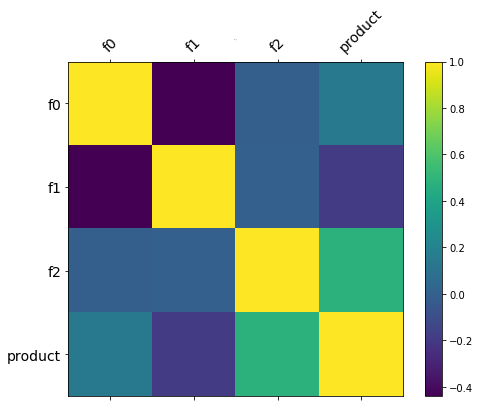

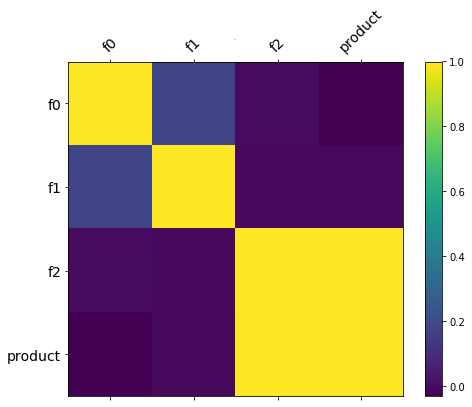

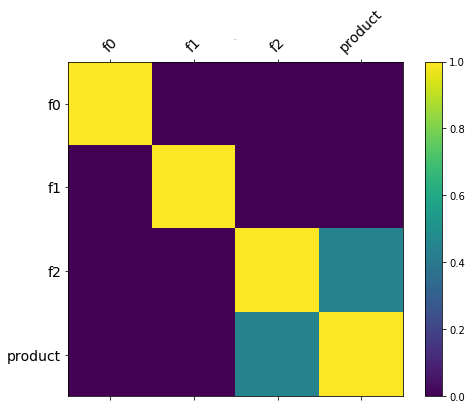

In [7]:
f = plt.figure(figsize=(8, 6))
plt.matshow(data_0.corr(), fignum=f.number)
plt.xticks(range(data_0.select_dtypes(['number']).shape[1]), data_0.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data_0.select_dtypes(['number']).shape[1]), data_0.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('data_0', fontsize=1)

f = plt.figure(figsize=(8, 6))
plt.matshow(data_1.corr(), fignum=f.number)
plt.xticks(range(data_1.select_dtypes(['number']).shape[1]), data_1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data_1.select_dtypes(['number']).shape[1]), data_1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('data_1', fontsize=1)

f = plt.figure(figsize=(8, 6))
plt.matshow(data_2.corr(), fignum=f.number)
plt.xticks(range(data_2.select_dtypes(['number']).shape[1]), data_2.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data_2.select_dtypes(['number']).shape[1]), data_2.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('data_2', fontsize=1)

Налицо явная взаимозависимость в признаке f2 и product, особенно в регионе 1. Удалять столбец не стал, тк в условиях написали, что признак категорически важен. Вопрос: нужно ли его удалять?

Перед обучение удалим лишний столбец id - смысла он не несет никакого

In [8]:
data_0n = data_0.drop(['id'], axis=1)
data_1n = data_1.drop(['id'], axis=1)
data_2n = data_2.drop(['id'], axis=1)
display(data_0n.head())
display(data_1n.head())
display(data_2n.head())

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


<a id='section_2'></a>

## Обучение и проверка модели

Обучим модели на трех регионах и вычислим RMSE 

In [9]:
target = data_0n['product']
features = data_0n.drop(['product'] , axis=1)
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train_0, target_train_0)
predicted_valid_0 = model.predict(features_valid_0)
mse = mean_squared_error(target_valid_0, predicted_valid_0)
print("Средний запас предсказанного сырья =", predicted_valid_0.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья = 92.59256778438038
RMSE = 37.5794217150813


In [10]:
target = data_1n['product']
features = data_1n.drop(['product'] , axis=1)
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train_1, target_train_1)
predicted_valid_1 = model.predict(features_valid_1)
mse = mean_squared_error(target_valid_1, predicted_valid_1)
print("Средний запас предсказанного сырья =", predicted_valid_1.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья = 68.728546895446
RMSE = 0.893099286775616


In [11]:
target = data_2n['product']
features = data_2n.drop(['product'] , axis=1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train_2, target_train_2)
predicted_valid_2 = model.predict(features_valid_2)
mse = mean_squared_error(target_valid_2, predicted_valid_2)
print("Средний запас предсказанного сырья =", predicted_valid_2.mean())
print("RMSE =", mse ** 0.5)

Средний запас предсказанного сырья = 94.96504596800489
RMSE = 40.02970873393434


Регионы 0 и 2 выглядят одинаково по запасам сырья. показатель RMSE тоже почти одинаков. Меня смущает регион 1 - слишком маленькая ошибка RMSE. Вопрос: это норма или нет?

<a id='section_3'></a>

## Подготовка к расчёту прибыли

In [12]:
budget = 10000000000
profit_1barell = 450000
boreholes200 = budget / profit_1barell # кол-во тыс барелей для безубытка на 200 скважинах
borehole1 = boreholes200 / 200 # кол-во тыс барелей для безубытка на 1 скважине из 200
print(boreholes200)
print(borehole1)

22222.222222222223
111.11111111111111


In [13]:
print('Соотношение среднего количества единиц продукции региона 0 с безубыточным показателем', predicted_valid_0.mean() / borehole1)
print('Соотношение среднего количества единиц продукции региона 1 с безубыточным показателем', predicted_valid_1.mean() / borehole1)
print('Соотношение среднего количества единиц продукции региона 2 с безубыточным показателем', predicted_valid_2.mean() / borehole1)

Соотношение среднего количества единиц продукции региона 0 с безубыточным показателем 0.8333331100594233
Соотношение среднего количества единиц продукции региона 1 с безубыточным показателем 0.618556922059014
Соотношение среднего количества единиц продукции региона 2 с безубыточным показателем 0.854685413712044


Выходит, что среднестатистическая скважина не дотягивает до безубыточности ни в одном регионе

<a id='section_4'></a>

## Расчёт прибыли и рисков 

Приводим значения к нужному виду

In [14]:
tv_0 = target_valid_0.reset_index(drop=True)
tv_1 = target_valid_1.reset_index(drop=True)
tv_2 = target_valid_2.reset_index(drop=True)
prv_0 = pd.Series(predicted_valid_0)
prv_1 = pd.Series(predicted_valid_1)
prv_2 = pd.Series(predicted_valid_2)

Расчет прибыли

In [15]:
def revenue(predict, target):
    sorted = predict.sort_values(ascending=False)
    selected = target[sorted.index][: 200]
    return (selected.sum()*profit_1barell)-budget
print('Вероятная прибыль с 200 скважин на территории 0: {:.2f}, млрд'.format(revenue(prv_0, tv_0)/ 1000000000))
print('Вероятная прибыль с 200 скважин на территории 1: {:.2f}, млрд'.format(revenue(prv_1, tv_1)/ 1000000000))
print('Вероятная прибыль с 200 скважин на территории 2: {:.2f}, млрд'.format(revenue(prv_2, tv_2)/ 1000000000))

Вероятная прибыль с 200 скважин на территории 0: 3.32, млрд
Вероятная прибыль с 200 скважин на территории 1: 2.42, млрд
Вероятная прибыль с 200 скважин на территории 2: 2.71, млрд


Функция 1000 раз формирует 500 выборок и в них выбирает 200 скважин по которым считает прибыль и убыток

In [16]:
def bootstrap(target, predict):
    state = np.random.RandomState(12345)
    values = []
    loss = 0
 
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = predict[target_subsample.index]
        val = revenue(probs_subsample, target_subsample)
        values.append(val)
        if val < 0:
            loss = loss+1

    values = pd.Series(values)
    return values, loss

In [17]:
values, loss = bootstrap(tv_0, prv_0)
lower = values.quantile(0.025) / 10**9
upper = values.quantile(0.975) / 10**9
print('РЕГИОН 0')
print('Средняя прибыль: {:.2f} млрд.'.format(values.mean()/10**9))
print('Вероятность убытка:', loss/1000)
print('95% доверительный интервал с млрд.', lower, 'по', upper)

РЕГИОН 0
Средняя прибыль: 0.43 млрд.
Вероятность убытка: 0.06
95% доверительный интервал с млрд. -0.10209009483793653 по 0.9479763533583689


In [18]:
values, loss = bootstrap(tv_1, prv_1)
lower = values.quantile(0.025) / 10**9
upper = values.quantile(0.975) / 10**9
print('РЕГИОН 1')
print('Средняя прибыль: {:.2f} млрд.'.format(values.mean()/10**9))
print('Вероятность убытка:', loss/1000)
print('95% доверительный интервал с млрд.', lower, 'по', upper)

РЕГИОН 1
Средняя прибыль: 0.52 млрд.
Вероятность убытка: 0.01
95% доверительный интервал с млрд. 0.06887322537050178 по 0.9315475912570496


In [19]:
values, loss = bootstrap(tv_2, prv_2)
lower = values.quantile(0.025) / 10**9
upper = values.quantile(0.975) / 10**9
print('РЕГИОН 2')
print('Средняя прибыль: {:.2f} млрд.'.format(values.mean()/10**9))
print('Вероятность убытка:', loss/1000)
print('95% доверительный интервал с млрд.', lower, 'по', upper)

РЕГИОН 2
Средняя прибыль: 0.44 млрд.
Вероятность убытка: 0.064
95% доверительный интервал с млрд. -0.128880547329789 по 0.969706954180268


<a id='section_5'></a>

## Выводы:

Рекомендован для разработки регион №1. В данном регионе максимальная прибыль, в доверительном интервале отсутствуют минусовые значения и риск убытков равен 1%. Результат интересный, учитывая то, что в этом регионе самый низкий показатель предсказанного среднего запаса сырья.